<a href="https://colab.research.google.com/github/quanphung1120/MachingLearning/blob/main/PerceptronAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [30]:
class Perceptron:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    # Generate a random number for w
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float128(0.)
    self.errors_ = []

    print("Dataset shape:", X.shape)
    print("Weights shape:", self.w_.shape)

    for _ in range(self.n_iter):
      errors = 0
      for features, target in zip(X, y):
        update = self.eta * (target - self.predict(features))
        self.w_ += update * features
        self.b_ += update

        errors += int(update != 0.0)

      self.errors_.append(errors)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
!pip install ucimlrepo

In [19]:
import pandas as pd
from google.colab import files

df = pd.read_csv("iris_data.csv", encoding='utf-8')
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


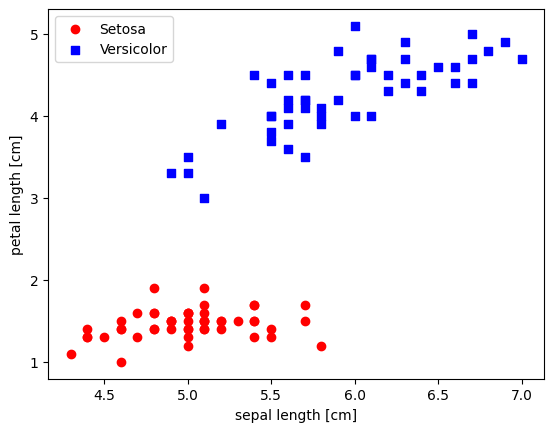

In [20]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

Dataset shape: (100, 2)
Weights shape: (2,)


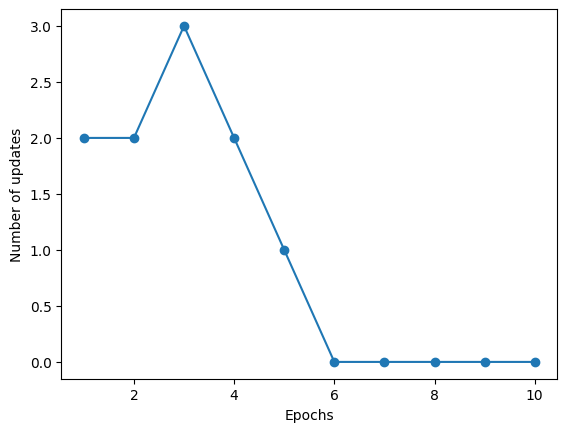

In [34]:
perceptron_model = Perceptron(eta=0.1, n_iter=10)

perceptron_model.fit(X, y)

plt.plot(range(1, len(perceptron_model.errors_) + 1), perceptron_model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 1. Khởi tạo markers và colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 2. Tạo bề mặt quyết định (Decision surface)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Tạo lưới tọa độ
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Dự đoán nhãn cho mọi điểm trên lưới
    # Lưu ý: .T giúp chuyển đổi mảng về dạng (số điểm, 2 đặc trưng)
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # 3. Vẽ vùng quyết định bằng contourf
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 4. Vẽ các mẫu dữ liệu thực tế lên biểu đồ
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

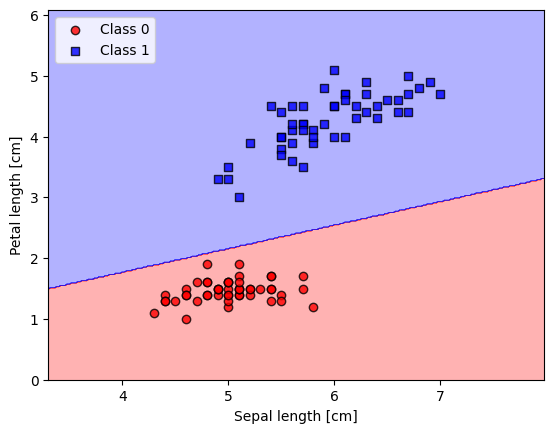

In [37]:
plot_decision_regions(X, y, classifier=perceptron_model)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()